# Simple SCAM Cases Comparison Plotting Scripts

In [60]:
import matplotlib.pyplot as mp
from matplotlib import gridspec
from matplotlib.ticker import FormatStrFormatter

import numpy as np
import pandas as pd
import cftime as cft
import nc_time_axis as nct # Provides pretty time axes on plots

import datetime as dt
import metpy.calc as mpy
from metpy.units import units
import metpy.constants as mconst

import xarray as xr
from pylab import *

In [61]:
## Constants ##
cp_air = mconst.dry_air_spec_heat_press.magnitude # Specific heat for dry air

## SIMPLE PLOTS ##

pdir = "/Users/rneale/nc_files/"
odir = "/Users/rneale/nc_files/iops/"
fig_dir = "/Users/rneale/Documents/NCAR/PBL/PBL_py_data/png_qlook"

#cases = ['FSCAM.T42_T42.togaII.100','FSCAM.T42_T42.togaII.100a','FSCAM.T42_T42.togaII.101','FSCAM.T42_T42.togaII.101a']
#cnames = ['CAM6','CAM6-noconv','CAM5','CAM5-noconv']


fig_pref = 'zm_ke'


#cases = ['FSCAM.T42_T42.togaII.100','FSCAM.T42_T42.togaII.100b','FSCAM.T42_T42.togaII.101','FSCAM.T42_T42.togaII.101b']
#cases = ['FSCAM.T42_T42.togaII.001','FSCAM.T42_T42.togaII.004','FSCAM.T42_T42.togaII.002','FSCAM.T42_T42.togaII.003','FSCAM.T42_T42.togaII.001.L32','FSCAM.T42_T42.togaII.001.L256']
#cnames = ['CAM6 (#CIN=1)','CAM6 (#CIN=2)','CAM6 (#CIN=3)','CAM6 (#CIN=5)','CAM6 (L32)','CAM6 (L256)']

#cases = ['FSCAM.T42_T42.togaII.001','FSCAM.T42_T42.togaII.004','FSCAM.T42_T42.togaII.003','FSCAM.T42_T42.togaII.001.L256','FSCAM.T42_T42.togaII.001.L256.nolev1zm']
#cnames = ['CAM6 (#CIN=1)','CAM6 (#CIN=2)','CAM6 (#CIN=5)','CAM6 (L256)','CAM6 (L256-nolev1zm)']

#cases = ['FSCAM.T42_T42.togaII.001','FSCAM.T42_T42.togaII.004','FSCAM.T42_T42.togaII.003','FSCAM.T42_T42.togaII.001.L64','FSCAM.T42_T42.arm97.001','FSCAM.T42_T42.arm97.001.L64']
#cnames = ['CAM6 (#CIN=1)','CAM6 (#CIN=2)','CAM6 (#CIN=5)','CAM6 (L64,#CIN=1)','CAM6 (ARM97)','CAM6 (ARM97, L64)']

#cases = ['FSCAM.T42_T42.togaII.001','FSCAM.T42_T42.togaII.001.org00']
#cnames = ['CAM6','CAM6 (zm_org)']

#cases = ['FSCAM.T42_T42.togaII.001','FSCAM.T42_T42.togaII.001.sflux01','FSCAM.T42_T42.togaII.001.L256','FSCAM.T42_T42.togaII.001.L256.sflux01','FSCAM.T42_T42.togaII.001.sflux2']
#cnames = ['CAM6','CAM6 (5m ref.)','CAM6 (L256)','CAM6 (L256, 5m ref.)','CAM6 (Zheng scheme)']

#cases = ['FSCAM.T42_T42.arm97.zm.ke000','FSCAM.T42_T42.arm97.zm.ke001']
#cnames = ['CAM6','CAM6-KE.ZM']

cases = ['FSCAM.T42_T42.togaII.zm.ke000','FSCAM.T42_T42.togaII.zm.ke002']
cnames = ['CAM6','CAM6-KE.ZM']



#cases = ['FSCAM.T42_T42.arm97.zm.ke000']
#cnames = ['CAM6']

#cases = ['FSCAM.T42_T42.rico.000','FSCAM.T42_T42.rico.000']
#cnames = ['CAM6','CAM6']

# Plots variable
ldiff_plot = False
ovar = None # If it does not stay None the plot obs

""""""
"""Variables"""
""""""

#vname = 'RELHUM'   ; vscale = 1. ; units2d='%' ; cmin = 50 ; cmax = 120. ; cmap = 'YlGnBu'
vname = 'Q'   ; vscale = 1000. ; units2d='g/kg' ; cmin = 0 ; cmax = 30. ; cmap = 'YlGnBu'
#vname = 'T'   ; vscale = 1.  ; units2d='K' ; cmin = 200 ; cmax = 300. ; cmap = 'RdBu_r'
#vname = 'BUOY' ; vscale = 1. ; units2d='K' ; cmin = -5 ; cmax = 5. ; cmap = 'RdBu_r'
#vname = 'CLOUD' ; vscale = 100. ; units2d='%' ; cmin = 0 ; cmax = 100. ; cmap = 'Purples'
#name = 'CONCLD' ; vscale = 100. ; units2d='%' ; cmin = 0 ; cmax = 50. ; cmap = 'Purples'
#vname = 'CLDICE'   ; vscale = 1000.
#vname = 'CLDLIQ' ; vscale = 1000.
#vname = 'CLDLIQZM' ; vscale = 1000.
#vname = 'DLFZM' ; vscale = 1000.
#vname = 'QRS' ; vscale = 86400.
#vname = 'ZMDQ'   ; vscale = 1000.*86400. ; units2d='g/kg/day' ; cmin = -5 ; cmax = 5. ; cmap = 'RdBu_r'
#vname = 'ZMDT'   ; vscale = 86400. ; units2d='K/day' ; cmin = -10 ; cmax = 10. ; cmap = 'RdBu_r'
#vname = 'DLF'   ; vscale = 1000.*86400. ; units2d='K/day' ; cmin = -10 ; cmax = 10. ; cmap = 'RdBu_r'
#vname = 'STEND_CLUBB'   ; vscale = 86400./cp_air ; units2d='K/day' ; cmin = -40 ; cmax = 40. ; cmap = 'RdBu_r'
#vname = 'WP2_CLUBB'   ; vscale = 1.; units2d='m2/s2' ; cmin = 0. ; cmax = 1. ; cmap = 'Purples'

#vname = 'DCQ'   ; vscale = 1000.*86400. ; units2d='g/kg/day' ; cmin = -8 ; cmax = 8. ; cmap = 'RdBu_r'
#vname = 'DTCOND' ; vscale = 86400. ; units2d='K/day' ; cmin = -10 ; cmax = 10. ; cmap = 'RdBu_r'

#vname = 'ZMMU' ; vscale = 3600. ; units2d='kg/m^2/hr' ; cmin = 0 ; cmax = 100. ; cmap = 'PuBuGn'
#vname = 'ZMMD' ; vscale = 3600. ; units2d='kg/m^2/hr' ; cmin = -20 ; cmax = 5. ; cmap = 'PuBuGn_r'
#vname = 'WINCLD' ; vscale = 1. ; units2d='m/s' ; cmin = 0; cmax = 20; cmap = 'Purples'

###### 1D fields ######

#vname1d = 'SHFLX' ; vscale1d = 1. ; units1d='W/m^2' ; pmin = 0. ; pmax= 20.
#vname1d = 'LHFLX' ; vscale1d = 1. ;  units1d='W/m^2' ; pmin = 0. ; pmax= 200.
#vname1d = 'U10' ; vscale1d = 1. ;  units1d='m/s' ; pmin = 0. ; pmax= 10.
#vname1d = 'TAUX' ; vscale1d = 1. ;  units1d='kg/m^2/s' ; pmin = -0.2 ; pmax= 0.0
#vname1d = 'ZBOT' ; vscale1d = 1. ;  units1d='m' ; pmin = 0. ; pmax= 150.
#vname1d = 'PRECT' ; vscale1d = 86400.*1000. ;  units1d='mm/day' ; pmin = 0. ; pmax= 15. ; ovar='Prec' ; oscale = 86400.
#vname1d = 'CAPE' ; vscale1d = 1. ;  units1d='J/kg' ; pmin = 0. ; pmax= 1000.
vname1d = 'LEL' ; vscale1d = 1. ;  units1d='level' ; pmin = 0. ; pmax= 35.

#vname1d = 'CLDLOW' ; vscale1d = 1.

/Users/rneale/nc_files/FSCAM.T42_T42.togaII.zm.ke000.cam.h0.1992-12-18-64800.nc
Variable on file, read in -> FSCAM.T42_T42.togaII.zm.ke000
/Users/rneale/nc_files/FSCAM.T42_T42.togaII.zm.ke002.cam.h0.1992-12-18-64800.nc
Variable on file, read in -> FSCAM.T42_T42.togaII.zm.ke002


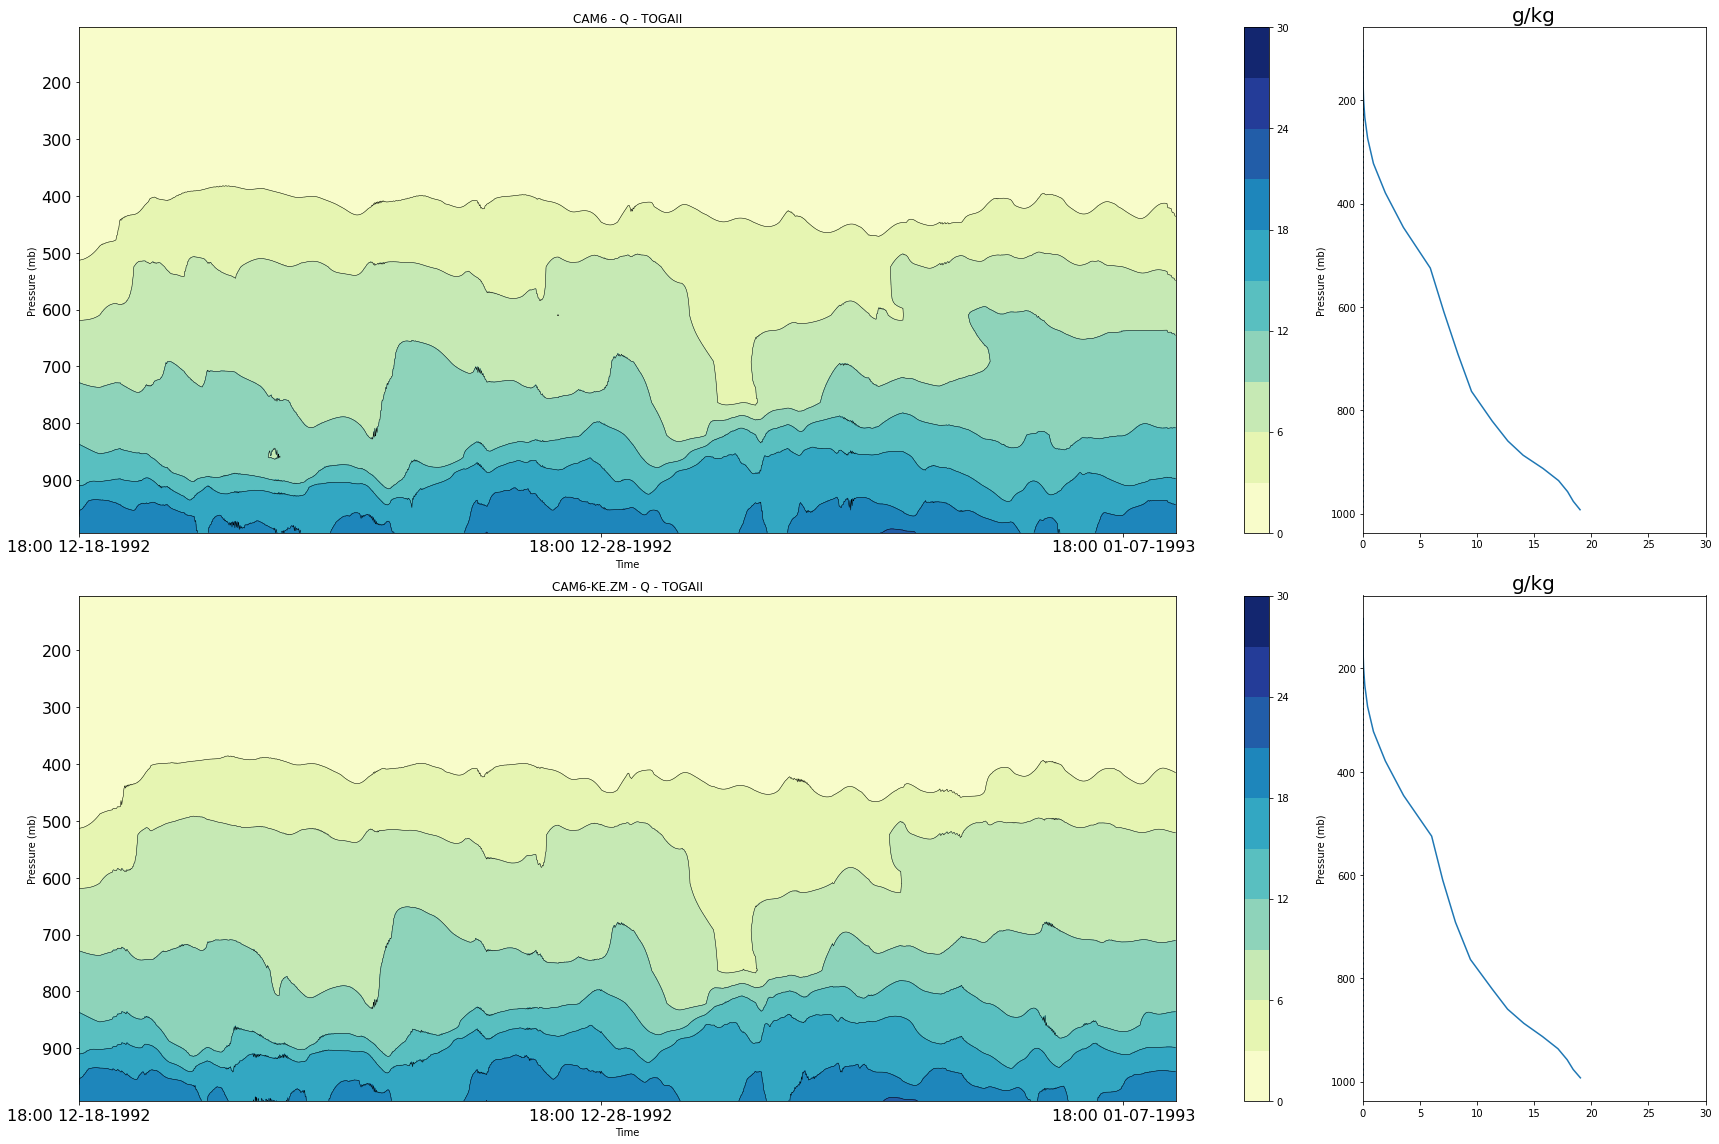

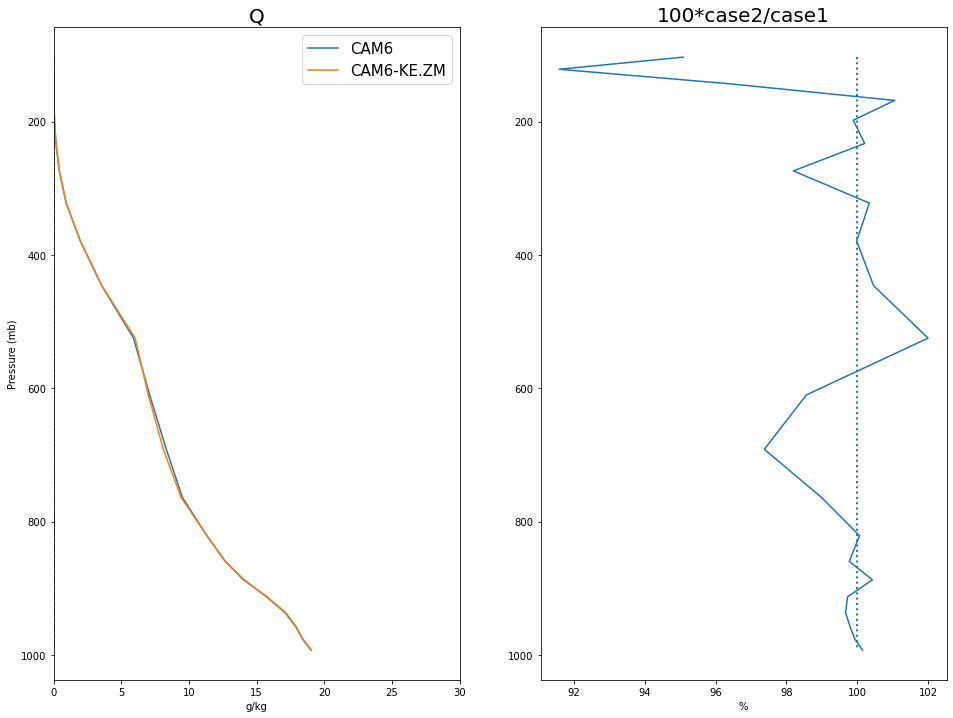

[  3.64346569   7.59481965  14.35663225  24.61222     35.92325002
  43.19375008  51.67749897  61.52049825  73.75095785  87.82123029
 103.31712663 121.54724076 142.99403876 168.22507977 197.9080867
 232.82861896 273.91081676 322.24190235 379.10090387 445.9925741
 524.68717471 609.77869481 691.38943031 763.40448111 820.85836865
 859.53476653 887.02024892 912.64454694 936.19839847 957.48547954
 976.32540739 992.55609512]


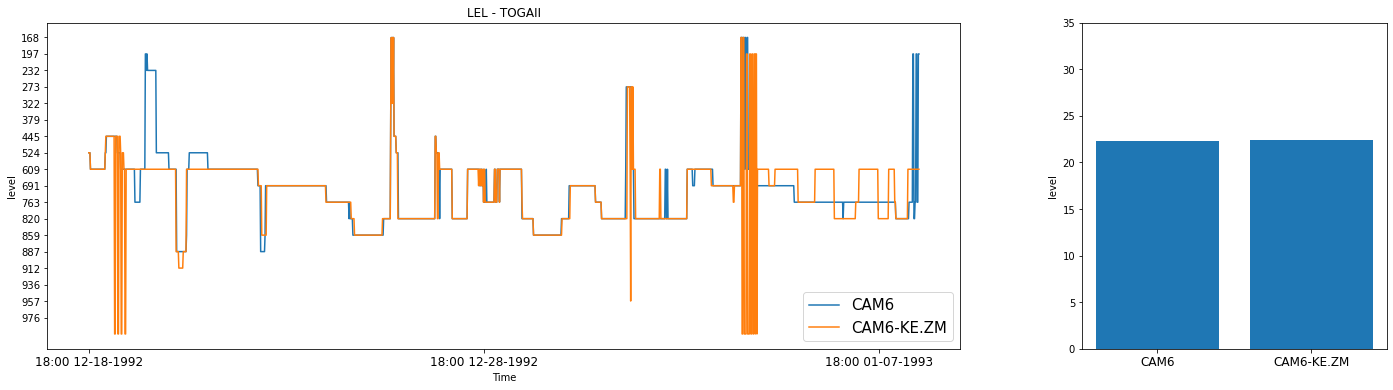

In [62]:
pntspan = 72*10 # Ntimes to span for reasonble tick spacing

# Identify IOP
if cases[0].find('togaII')!=-1 : csuf =  '.cam.h0.1992-12-18-64800.nc' ; iop = 'TOGAII' 
if cases[0].find('arm97')!=-1 : csuf =  '.cam.h0.1997-06-18-84585.nc' ; iop = 'ARM97'
if cases[0].find('rico')!=-1 : csuf =  '.cam.h0.1995-07-15-00000.nc' ; iop = 'rico' 
    
    
lobs = False if ovar == None else True 
if lobs: 
    obs_in = xr.open_dataset(odir+iop+'_4scam.nc')
ncases = len(cases)

## Some plot controls ##


plt1, (ax1) = plt.subplots(ncases,2, figsize=(24,16), gridspec_kw={'width_ratios': [4, 1]})  



####### LOOP CASES ###########

for ic in range(0,len(cnames)):

    
    print(pdir+cases[ic]+csuf)
    scam_in = xr.open_dataset(pdir+cases[ic]+csuf)

    if (vname in list(scam_in.keys())): # If a varible doesn't exists just fill with NaNS
    
        print('Variable on file, read in -> '+cases[ic])

        pvar = scam_in[vname].isel(lat=0,lon=0)
        if 'ilev' in list(pvar.dims) : pvar = pvar.rename({'ilev':'lev'})
     
    else : # just assign dummy filed from T structure
        pvar = scam_in['T'].isel(lat=0,lon=0)
        pvar[:,:] = np.nan

    
    
    pvar = pvar.loc[:,100:]    
    pvar = pvar.transpose()*vscale
    dlev = (cmax-cmin)/10

    if ic == 0: plevels = np.arange(cmin,cmax+dlev,dlev,dtype=np.float)
#    plevels = [0.1,0.3,0.4,0.5,0.75,1,2,3,4,5,8,10,15,20,25,30]

### Time zxes lebeling from (annoying) xarray cftime format
    tdate = pvar.time.dt.strftime("%H:%M %m-%d-%Y") # Works for time axis and labeling

    
    
#""" ########################### """
#""" ## Timseries Height Plot ## """
#""" ########################### """
    
    plt1 = ax1[ic,0].contourf(tdate,pvar.lev,pvar,levels=plevels,cmap=cmap) 
    plt1 = mp.colorbar(plt1,ax=ax1[ic,0])
    ax1[ic,0].contour(tdate,pvar.lev,pvar,levels=plevels,colors='black',linewidths=0.5) 
#    ax1[ic,0] = mp.add_axes([0.1,0.1,0.75,0.75]) # axis starts at 0.1, 0.1
    ax1[ic,0].set_title(cnames[ic],fontsize=29)
    ax1[ic,0].set_ylabel('Pressure (mb)') 
    ax1[ic,0].set_xlabel("Time")
    for label in (ax1[ic,0].get_xticklabels() + ax1[ic,0].get_yticklabels()):
        label.set_fontsize(16)
    ax1[ic,0].set_xticks(np.arange(0, len(tdate)+1, pntspan))
    ax1[ic,0].invert_yaxis()  
    ax1[ic,0].set_title(cnames[ic]+' - '+vname+' - '+iop)
    mp.tight_layout()
    
    
    
## Average Plot ##
    pvarm = pvar.mean(axis=1)
    
# Gather 1d timeseries variables
    if vname1d != 'PRECT' : pvar1d = vscale1d*scam_in[vname1d]
    if vname1d == 'PRECT' : pvar1d = vscale1d*(scam_in['PRECC']+scam_in['PRECL'])
    pvar1d = pvar1d.isel(lat=0,lon=0)
    
    if ic == 0 :
        pvarm_all = pvarm 
        lev0 = pvarm.lev
        pvar1d_all = pvar1d # 1D timseries variables
    else :
        pvarm_int = pvarm.interp(lev=lev0,method="linear")
        pvarm_all = xr.concat((pvarm_all,pvarm_int),dim='case')  
        pvar1d_all = xr.concat((pvar1d_all,pvar1d),dim='case')  
        
#""" ########################### """
#""" ## Time-ave Height Plot  ## """
#""" ########################### """

    ax1[ic,1].plot(pvarm,pvarm.lev)
    ax1[ic,1].set_xlim([1.*cmin,1.*cmax])
    
    ax1[ic,1].set_title(units2d,fontsize = 20)
    ax1[ic,1].set_ylabel('Pressure (mb)') 
   
    ax1[ic,1].invert_yaxis()  
    
    ax1[ic,1].vlines(0., min(pvar.lev),max(pvar.lev), linestyle="dotted",lw=2)


mp.savefig(fig_dir+cases[0]+'.'+fig_pref+'_scam_ts_'+vname+'.png', dpi=80,facecolor='white')
mp.show()    

    
# Average plot of profile plots. ##

plt1av, ax1av = mp.subplots(1,2,figsize=(16, 12)) # Ave plot of all cases

plt1zv = ax1av[0].plot(pvarm_all.transpose(),pvarm_all.lev)  


ax1av[0].set_ylabel('Pressure (mb)') 
ax1av[0].set_xlim([1.*cmin,1.*cmax])
ax1av[0].set_xlabel(units2d) 
#ax1av.set_ylim(ax1.get_ylim()[::-1])
ax1av[0].set_title(vname,fontsize=20)
ax1av[0].vlines(0., min(pvar.lev),max(pvar.lev), linestyle="dotted",lw=2)
ax1av[0].invert_yaxis()  
ax1av[0].legend(cnames,fontsize=15)

# % age difference plot.
plt1zv = ax1av[1].plot(100.*pvarm_all[1].transpose()/pvarm_all[0].transpose(),pvarm_all.lev)  

ax1av[1].set_title('100*case2/case1',fontsize=20)
ax1av[1].set_xlabel('%') 

ax1av[1].vlines(100., min(pvar.lev),max(pvar.lev), linestyle="dotted",lw=2)
ax1av[1].invert_yaxis()

mp.savefig(fig_dir+cases[0]+'.'+fig_pref+'_scam_aves_'+vname+'.png', dpi=100)
mp.show()


""" ########################### """
""" ## Timseries 1D Plot     ## """
""" ########################### """

# 1d timeseries plots
plt1d, ax1d = mp.subplots(1,2,figsize=(24, 6),gridspec_kw={'width_ratios': [3, 1]}) # Ave plot of all cases

# Plot obs
if lobs:
    cnames_all = np.append(cnames,iop)
    var_o = oscale*obs_in[ovar].isel(lat=0,lon=0)
    pvar_all = np.vstack([pvar1d_all,[var_o.values]])
else:
    cnames_all = cnames
    pvar_all = pvar1d_all

ax1d[0].plot(tdate,pvar_all.transpose())  

## Still might need to solbve the date problem
#odate = pd.to_datetime('19970514.567', format='%Y%m%d')
#date_o = var_o.time.dt.strftime("%H:%M %m-%d-%Y") 
#odate = [cftime.datetime(year=2017, month=2, day=n) for n in range(1, 31)]
#odate = dt.date(year=obs_in.year, month=obs_in.month, day=obs_in.day
#date_o = var_o.time.dt.strftime("%H:%M %m-%d-%Y") 

ax1d[0].legend(cnames_all,fontsize=15)

for label in (ax1d[0].get_xticklabels() + ax1d[1].get_xticklabels()):
        label.set_fontsize(12)

ax1d[0].set_xlabel("Time") 
ax1d[0].set_ylabel(units1d) 
ax1d[0].set_xticks(np.arange(0, len(tdate)+1, pntspan))
ax1d[0].set_title(vname1d+' - '+iop)


print(scam_in.lev.values)
if vname1d=='LEL':

    lel_range = np.arange(pvar_all.values.min(),pvar_all.values.max()) # Range of lel
    lel_range = lel_range.astype(int)

    ax1d[0].set_yticks(lel_range)
    ax1d[0].set_yticklabels(scam_in.lev[lel_range].values.astype(int))
    ax1d[0].invert_yaxis()

    
    
""" ########################### """
""" ### Average bar chart ##### """
""" ########################### """

ax1d[1].bar(cnames_all,pvar_all.mean(axis=1))
ax1d[1].set_ylim([pmin,pmax])
ax1d[1].set_ylabel(units1d) 




mp.savefig(fig_dir+cases[0]+'.'+fig_pref+'_scam_1d_'+vname1d+'.png', dpi=100)
mp.show()

    